# Kaggle电子零售交易之数据挖掘

项目链接 : [这是一个项目的传送门哦^_^](https://github.com/fiona187412/DataAnalysis).
只是一个没有感情的萌新，不足之处，欢迎指教。
## 背景
----------
在这个以信息和数字为导向的时代,绝大多数的相互作用以及行为是通过网络的,而之前都是人为控制的。电子商务是一个主要的数字通信和信息时代的应用,商品零售是其中较为显著的一个例子。在电子商务中购买和销售行为被转移到能够推广商品以及接受支付的网络、服务器以及网站上。网络零售店所有者必须能够找到根据消费者年龄、性别、地址、社会状态等因素向他们推荐最为合适的产品。
本文通过Kaggle电子零售网站的真实数据进行数据挖掘，使用不同模型分析了用户的消费行为。
- 首先使用 python 进行数据的信息的提取和分析（简单描述统计、缺失值、异常值处理）；
- 其次,从不同角度可视化观察用户消费行为(折线图、饼图、动态可视化)；
- 最后,使用了RFM模型、KMeans （机器学习算法）, 对用户进行价值提取；
- 获得了合理的方式和信息用于网站管理者优化宣传的效果和对于未来的行为做出正确的决定, 同时基于顾客以往的购买行为能够对每一个顾客做出最为合适的商品推荐。 

【数据源】： [这是一个链接哦^_^ ](https://www.kaggle.com/jihyeseo/online-retail-data-set-from-uci-ml-repo).

数据集来自一个在英国注册的没有实体店的电子零售公司，在2010年12月1日到2011年12月9日期间发生的网络交易数据。

【Note】：
- 本次分析为了保证完整性，故选取一整年的交易数据，即从2010年12月1日到2011年12月1日期间的数据。
- 原数据集以xlsx格式存储，总共有541909条数据，8个字段，为了后续方便，本次转换为了csv格式。

 数据字段介绍

| Features  | Description | Type | Size |
| :------------: |:---------------:|:------------: |:---------------:|
|InvoiceNo | 订单号 | String | 25900 |
|StockCode   | 产品编号 | String | 4070 |
|Description  | 产品描述 | String | NA |
|Quantity  | 每一笔交易中购买的产品数量 | integer | NA|
|InvoiceDate | 交易的时间和日期 | datetime | NA
|UnitPrice | 产品单价 | float | NA |
|CustomerID | 用户ID | String | NA|
|Country |用户所在国家 | String | NA |



## 分析思路及指标
----------

#### 1. 数据总览 (Data Describe)

- 描述统计分析

#### 2. 数据预处理 (Data Preprocessing)

- 数据类型转换
- 缺失值、异常值处理

#### 3. 指标体系 (Index)

- 整体运营指标
    - 目的：了解电子零售商当前的运营状态
    - 用户消费趋势分析（按月）
        - 月销售数量
        - 月销售总额
        - 月均销售额
    - （按周）
        - 周销售数量
        - 周销售总额
        - 周均销售额
    - 效率指标
        - 客单价
        - 产品件单价
        - 连带率
    - 退货指标
        - 退货金额
        - 退货数量
        - 退货用户数
- 产品指标
    - 目的：了解产品的优劣
    - 销量最高的产品
    - 销售金额占比最高的产品
    - 价值用户喜欢一起购买的产品
    
- RFM 模型指标 / Kmeans 模型
    - 目的： 挖掘潜在价值用户，指导运营策略的设计与执行
    - Recency
    - Frequency
    - Monetary
- 价值用户行为指标
    -目的：了解用户的消费习惯
    - 用户首次、最近一次消费时间
    - 新老客户占比
    - 用户购买周期（按订单）
    - 用户生命周期 (按第一次 & 最后一次消费)
    
#### 4. 模型构建 (Bulid Model)

- RFM 用户价值模型
- Kmeans 机器学习模型

#### 5. 模型评估 (Evaluate)
- PCA 降维可视化分析
- Silhouette Coefficient 
- Calinski-Harabaz Index 

#### 6. 总结 (Conclusion)


#### 致谢（Acknowledge）
- [Cohort Analysis & Customer Segmentation with RFM](https://www.kaggle.com/mahmoudelfahl/cohort-analysis-customer-segmentation-with-rfm#Recency,-Frequency-and-Monetary-Value-calculation).
- [Cohort Analysis: Beginners Guide to Improving Retention](https://clevertap.com/blog/cohort-analysis/).
- [RFM analysis for Customer Segmentation](https://clevertap.com/blog/rfm-analysis/).
- [从电子零售交易数据挖掘价值用户](https://zhuanlan.zhihu.com/p/62146715).


In [1]:
import pandas as pd
import numpy as np

import datetime as dt


import matplotlib.pyplot as plt
import seaborn as sns

from pyecharts.charts import Line
from pyecharts import options as opts 

%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('Online-Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom


#### 理解数据

| Features  | Description | Type | Size |
| :------------: |:---------------:|:------------: |:---------------:|
|InvoiceNo | 订单号 | String | 25900 |
|StockCode   | 产品编号 | String | 4070 |
|Description  | 产品描述 | String | NA |
|Quantity  | 每一笔交易中购买的产品数量 | integer | NA|
|InvoiceDate | 交易的时间和日期 | datetime | NA
|UnitPrice | 产品单价 | float | NA |
|CustomerID | 用户ID | String | NA|
|Country |用户所在国家 | String | NA |


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### 【注意】
- CustomerID 、description 存在缺失，需要进行处理
- 检查和处理重复数据
- InvoiceDate 需要处理成时间格式
- 新建两列（月份/天）方便后续数据指标加工

In [4]:
###缺失数据检查与处理
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
### 缺失值直接按行删除
df = df.dropna(subset=['CustomerID'])
df.isnull().sum().sum()

0

In [6]:
### 重复数据检查
df.duplicated().sum()


5225

In [7]:
### 重复数据删除
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
### 转换日期
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d')

### 新建年份、月份列
df['year'] = df['InvoiceDate'].apply(lambda x: x.year )
df['month'] = df['InvoiceDate'].apply(lambda x: x.month)

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null datetime64[ns]
UnitPrice      401604 non-null float64
CustomerID     401604 non-null float64
Country        401604 non-null object
year           401604 non-null int64
month          401604 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 33.7+ MB


In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID,year,month
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,2010.934378,7.595407
std,250.283037,69.764035,1714.006089,0.247620,3.417451
min,-80995.000000,0.000000,12346.000000,2010.000000,1.000000
25%,2.000000,1.250000,13939.000000,2011.000000,5.000000
50%,5.000000,1.950000,15145.000000,2011.000000,8.000000
75%,12.000000,3.750000,16784.000000,2011.000000,11.000000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000


-  Quantity(数量) ： Min= -80995 ，mean = 12.18， median = 5 ，max = 80995，可以观察到mean > median ,呈 right skew ，且 min ，max 都很大，存在异常值
- UnitPrice (单价)： Min = 0， Mean = 3.47， median = 1.95， max = 38970 . mean > median ，呈现 right skew， 并且max 非常大，存在异常点
- 需要对该两列的异常值进行筛除

In [12]:
df = df[(df ['Quantity'] > 0) &(df['UnitPrice'] > 0)]
df.describe()

,Quantity,UnitPrice,CustomerID,year,month
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865,2010.934631,7.601871
std,180.492832,22.241836,1713.539549,0.247177,3.415015
min,1.000000,0.001000,12346.000000,2010.000000,1.000000
25%,2.000000,1.250000,13955.000000,2011.000000,5.000000
50%,6.000000,1.950000,15150.000000,2011.000000,8.000000
75%,12.000000,3.750000,16791.000000,2011.000000,11.000000
max,80995.000000,8142.750000,18287.000000,2011.000000,12.000000


In [13]:
df= df[~( df['InvoiceDate'] < '2011-12-01') == False] 

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
...,...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom,2011,11
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom,2011,11
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom,2011,11
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom,2011,11


In [15]:
df['InvoiceDate'] < '2011-12-01'

0         True
1         True
2         True
3         True
4         True
          ... 
516364    True
516365    True
516366    True
516367    True
516368    True
Name: InvoiceDate, Length: 375666, dtype: bool

### 运营指标

- 每月交易订单量 （Monthly transaction）
- 每月销售额
- 每月均销售额

In [16]:
#### 因为一个订单包含多个产品，需要去重，多个商品在同一个订单的仅计算一个订单
month_group = df.groupby(['year','month'])
month_order = month_group.InvoiceNo.apply(lambda x : len(np.unique(x)))

In [17]:
#### 
df['Amount'] = df.Quantity * df.UnitPrice
month_amount = df.groupby(['year','month']).Amount.sum()

In [18]:
month_order

year  month
2010  12       1400
2011  1         987
      2         997
      3        1321
      4        1149
      5        1555
      6        1393
      7        1331
      8        1280
      9        1755
      10       1929
      11       2657
Name: InvoiceNo, dtype: int64

In [19]:
month_amount

year  month
2010  12        570422.730
2011  1         568101.310
      2         446084.920
      3         594081.760
      4         468374.331
      5         677355.150
      6         660046.050
      7         598962.901
      8         644051.040
      9         950690.202
      10       1035642.450
      11       1156205.610
Name: Amount, dtype: float64

In [20]:
avg_monthamount=round(month_amount.sum() / 12, 2)
avg_monthamount

697501.54

#### 将每个交易日期转换成星期进行统计

In [21]:
df['week'] = df.InvoiceDate.map(lambda x:x.weekday())
week_group = df.groupby('week')
week_order = week_group.InvoiceNo.apply(lambda x : len(np.unique(x)))

In [22]:
week_order 

week
0    2747
1    3074
2    3351
3    3801
4    2674
6    2107
Name: InvoiceNo, dtype: int64

In [23]:
week_amount = df.groupby(['week']).Amount.sum()
week_amount 

week
0    1305523.311
1    1651744.141
2    1515053.230
3    1878214.400
4    1254225.051
6     765258.321
Name: Amount, dtype: float64

In [24]:
week_avg = round(week_amount.sum()/6,2)
week_avg

1395003.08

- 源数据集里没有 5 (即星期六，可以姑且认为系统星期六不开放，进行维护或其他)

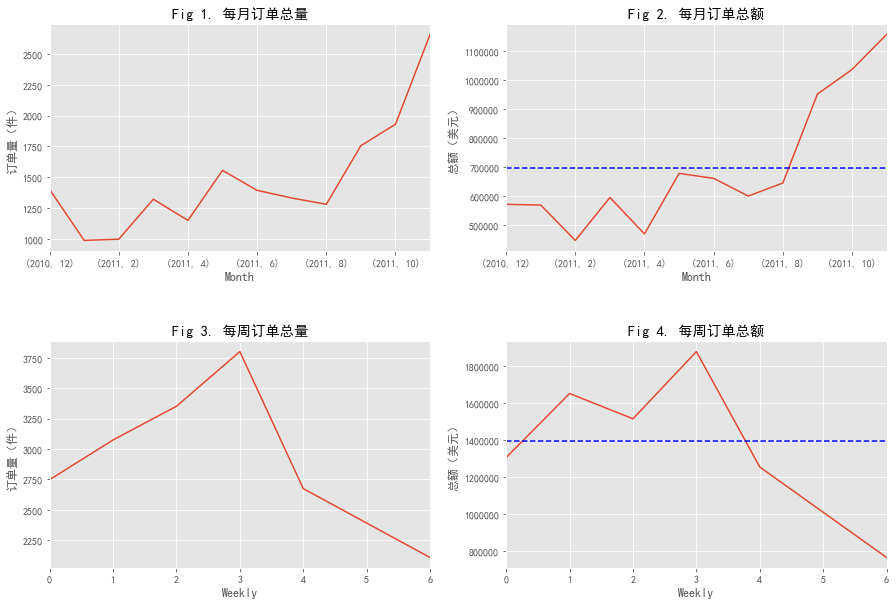

In [25]:
#### 绘图
plt.figure(figsize=(15, 10))
###   按月
plt.subplot(2,2,1)
month_order.plot(title='Fig 1. 每月订单总量')
plt.xlabel('Month')
plt.ylabel('订单量（件）')

plt.subplot(2,2,2)
month_amount.plot(title='Fig 2. 每月订单总额')
plt.axhline(y=avg_monthamount,color="blue",ls="--")
plt.xlabel('Month')
plt.ylabel('总额（美元）')

###   按周
plt.subplot(2,2,3)
week_order.plot(title='Fig 3. 每周订单总量')
plt.xlabel('Weekly')
plt.ylabel('订单量（件）')

plt.subplot(2,2,4)
week_amount.plot(title='Fig 4. 每周订单总额')
plt.axhline(y=week_avg,color="blue",ls="--")
plt.xlabel('Weekly')
plt.ylabel('总额（美元）')
plt.subplots_adjust( hspace=0.4)
plt.show()

In [26]:

line_chart = Line()
line_chart.add_xaxis(list(['Mon', 'Tue','Wed','Thur','Fri','Sun']))
line_chart.add_yaxis("消费总额（英镑）",
                     list(round(week_amount, 2)),
                     linestyle_opts=opts.LineStyleOpts(color='red',width=2),
                     markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_='average')]),
                     markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_='max')])
                    )
line_chart.set_global_opts(
title_opts=opts.TitleOpts(title="每周订单总额"))
line_chart.render_notebook()
# line_chart.render('Weekly_Amount.html')

- 客单价 = 销售总额 / 总用户数 

In [27]:
per_customer_amount = round(df.Amount.sum() / (df.drop_duplicates(subset=['CustomerID']).shape[0]), 2)
per_customer_amount

1947.87

- 件单价 = 销售总额 / 订单总数 

In [28]:
per_Item = round(df.Amount.sum()/ df.Quantity.sum(), 2) 
per_Item

1.72

- 连带率 = 销售产品总数 / 总交易次数

In [29]:
joint_Rate = round(df.Quantity.sum() / (df.drop_duplicates(subset=['InvoiceNo']).shape[0]), 2 )
joint_Rate

274.04

- 退货金额：原始数据集中以c开头的订单号为退货订单 

In [30]:
refund=df.loc[:,'InvoiceNo'].str.startswith('c')
refund.unique()

array([False])

返回 array([False])，则表示该数据集中不包含退货订单。因此本次不做退货的分析

#### RFM 用户分层
- 计算出RFM模型的每一个指标，
- 采用K-means clustering alrogithm算法将用户进行分组从而找出最具有价值的用户群。

【Note】
- 在实际生活中，我们会使用今天或者昨天的购买数据作为最近一次的消费快照

In [31]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
snapshot_date
#The last day of purchase in total is 09 DEC, 2011. To calculate the day periods, 
#let's set one day after the last one,or 
#10 DEC as a snapshot_date. We will cound the diff days with snapshot_date.

Timestamp('2011-12-01 17:37:00')

In [32]:
rfm = df.pivot_table(index  = 'CustomerID',
                     values = ['InvoiceNo', 'Amount', 'InvoiceDate'],
                     aggfunc = {
                        'InvoiceNo': 'count',
                        'Amount': 'sum',
                        'InvoiceDate': lambda x : (snapshot_date - x.max()).days
                    })



In [33]:
rfm.rename(columns={'InvoiceDate':'Recency',
                    'InvoiceNo':'Frequency',
                    'Amount': 'Monetary'}, inplace=True)

In [34]:
rfm.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,77183.60,317,1
12347.0,4085.18,31,171
12348.0,1797.24,67,31
12349.0,1757.55,10,73
12350.0,334.40,302,17


In [35]:
rfm.describe()

,Monetary,Recency,Frequency
count,4297.000000,4297.000000,4297.00000
mean,1947.874902,91.460088,87.42518
std,8351.696003,98.574043,213.64727
min,2.900000,1.000000,1.00000
25%,303.160000,16.000000,17.00000
50%,650.750000,50.000000,40.00000
75%,1594.230000,146.000000,96.00000
max,268478.000000,365.000000,7212.00000


In [36]:
#### 使用 切比雪夫定理筛出异常值 +- 3* std

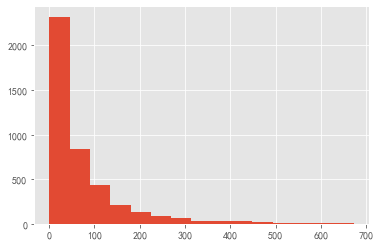

In [37]:

rfm.query('Frequency<40+3*214').Frequency.hist(bins=15)

In [38]:
#Bin information
bins2=[1,20,40,60,80,100,120,140,160,180,200,1000]
pd.cut(rfm.Frequency,bins2).value_counts()

(1, 20]        1230
(20, 40]        878
(40, 60]        502
(200, 1000]     397
(60, 80]        329
(80, 100]       272
(100, 120]      200
(120, 140]      143
(140, 160]      112
(160, 180]       82
(180, 200]       63
Name: Frequency, dtype: int64

可以看到呈长尾分布，即大部分用户消费次数较少，而少部分用户消费次数少，但金额大。

建立用户行为评分机制，评分从1-4，对于recency标签，数值越大评分越小，因为商家喜欢近期活跃的用户，对于frequency购买频率以及monetary消费总额是越大评分越高。

In [39]:
#Building RFM segments
r_labels =range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)

根据RFM用户三个标签对用户行为进行划分，使用了pd.qcut函数对每个标签下的数据进行4等分，并且赋予评分。

In [40]:
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels)
m_quartiles = pd.qcut(rfm['Monetary'],q=4,labels = m_labels)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

有了RFM每个标签的评分后进行统计和算出每一位用户的最终得分，这里是把每个标签的评分相加。

In [41]:
# Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Monetary,Recency,Frequency,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,77183.60,317,1,1,1,4,114,6.0
12347.0,4085.18,31,171,3,4,4,344,11.0
12348.0,1797.24,67,31,2,2,4,224,8.0
12349.0,1757.55,10,73,4,3,4,434,11.0
12350.0,334.40,302,17,1,1,2,112,4.0


【Note】:
- 我们会对近期活跃的客户比近期不活跃的客户进行评分，因为每家公司都希望自己的客户是近期的客户
- 我们会给“频率”和“货币价值”贴上更高的标签，因为我们希望客户花更多的钱，更频繁地光顾(这与最近的订单不同)。

#### 在将RFM细分市场用于目标市场或其他业务应用程序之前，最好先调查细分市场的大小。

### 

In [42]:
rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)[:5]

RFM_Segment
444    398
111    382
344    251
122    192
211    170
dtype: int64

In [43]:
# 过滤 RFM 分层模型 ，选取 层次为‘111’的前5个用户
rfm[rfm['RFM_Segment'] == '111'].head()

,Monetary,Recency,Frequency,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12353.0,89.00,195,4,1,1,1,111,3.0
12361.0,189.90,279,10,1,1,1,111,3.0
12401.0,84.30,295,5,1,1,1,111,3.0
12402.0,225.60,315,11,1,1,1,111,3.0
12441.0,173.55,358,11,1,1,1,111,3.0


In [44]:
rfm.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean',
                             'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3.0         255.2       8.1    154.6   382
4.0         178.4      13.9    237.9   376
5.0         151.1      20.2    365.7   495
6.0          96.0      27.0    795.2   478
7.0          77.3      37.2    727.5   450
8.0          60.7      52.5    971.1   458
9.0          47.4      77.1   1354.4   404
10.0         33.2     113.5   1893.4   437
11.0         20.5     186.7   4150.3   419
12.0          7.4     363.4   9484.0   398

使用 RFM 评分将用户进行划分， 重要价值用户/一般用户/潜在用户

In [45]:
def segments (df) :
    if df['RFM_Score'] > 9:
        return 'Gold'
    elif (df['RFM_Score'] >5) and (df['RFM_Score'] <= 9) :
        return 'Sliver'
    else :
        return 'Bronze'

rfm['General_Segment'] = rfm.apply(segments , axis = 1)
rfm.groupby('General_Segment').agg({'Recency' :'mean',
                                   'Frequency' : 'mean',
                                   'Monetary' : ['mean', 'count']}).round(1)

Recency Frequency Monetary      
                   mean      mean     mean count
General_Segment                                 
Bronze            191.0      14.6    263.0  1253
Gold               20.8     217.3   5056.7  1254
Sliver             71.3      47.4    949.4  1790

### K-Means 挖掘价值用户

K-Means算法的应用有以下要点：
- 标签的分布是对称的，not skewed；
    - 使用对数变换改变分布，且对数变换只适用于大于零的数值
- 消除量纲的影响，即均值、方差需要标准化
    - 因为 standardization 会产生负值 
- 先 log ——> standardization
- K值得选取
    - 可视化方法： 肘部法 （Elbow Criterion）
    - 数学方法：轮廓系数
    - 实验和假设的方法

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [47]:
#### 对数变换 (Logarithmic transformation)
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1)

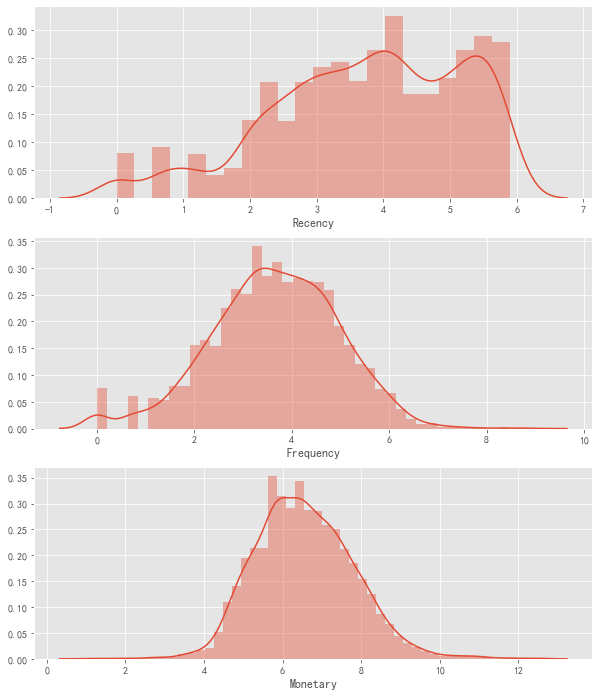

In [48]:
#plot the distribution of RFM values
f,ax=plt.subplots(figsize=(10,12))
plt.subplot(3,1,1);sns.distplot(rfm_log.Recency,label='Recency')
plt.subplot(3,1,2);sns.distplot(rfm_log.Frequency,label='Frequency')
plt.subplot(3,1,3);sns.distplot(rfm_log.Monetary,label='Monetary')
plt.show()

标准化（Standardization）

In [49]:
#Normalize the variables with StandardScaler

scaler = StandardScaler()
scaler.fit(rfm_log)
#Store it separately for clustering
rfm_normalized=scaler.transform(rfm_log)

####  寻找最佳参数 k 值
- Plot the number of clusters against within-cluster sum-of-squared-errors (SSE) - sum of squared distances from every data point to their cluster center
- Identify an "elbow" in the plot
- Elbow - a point representing an "optimal" number of clusters

In [50]:
### 寻找最佳参数 k 值
k_range = range(1, 8)
inertias = []
for k in k_range:
    kc = KMeans(n_clusters = k, random_state = 1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

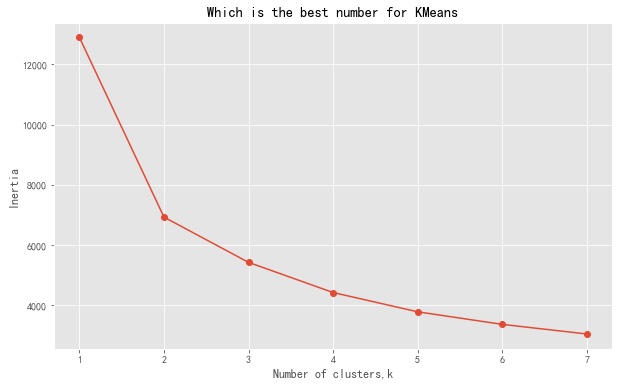

In [51]:
#plot ks vs inertias
f,ax = plt.subplots(figsize=(10,6))
plt.plot(k_range,inertias,'-o')
plt.xlabel('Number of clusters,k')
plt.ylabel('Inertia')
plt.title('Which is the best number for KMeans')
plt.show()

#### 使用模型进行用户聚类

In [52]:
k_range = KMeans(n_clusters=3, random_state=1)
k_range.fit(rfm_normalized)

cluster_labels = k_range.labels_

rfm_k = rfm[['Recency', 'Frequency', 'Monetary']]
rfm_k3 = rfm_k.assign(k_cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster
rfm_k3.groupby('k_cluster').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(0)

Recency Frequency Monetary      
             mean      mean     mean count
k_cluster                                 
0            67.0      58.0   1063.0  1814
1            16.0     244.0   5922.0  1016
2           173.0      15.0    290.0  1467

In [53]:
rfm.head()

,Monetary,Recency,Frequency,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
12346.0,77183.60,317,1,1,1,4,114,6.0,Sliver
12347.0,4085.18,31,171,3,4,4,344,11.0,Gold
12348.0,1797.24,67,31,2,2,4,224,8.0,Sliver
12349.0,1757.55,10,73,4,3,4,434,11.0,Gold
12350.0,334.40,302,17,1,1,2,112,4.0,Bronze


#### 理解、对比不同层级的用户
- 市场调查技术，以比较不同的细分市场
- 每个层次属性的可视化表示
- 需要先归一化化数据(中心和规模)
- 绘制每个层次中每个属性的平均规范化值

In [54]:
rfm_k = rfm[['Recency', 'Frequency', 'Monetary']]
rfm_normalized1 = pd.DataFrame(rfm_normalized, index=rfm_k.index,columns=rfm_k.columns)
rfm_normalized1['k_cluster'] = k_range.labels_
rfm_normalized1['General_Segment'] = rfm['General_Segment']
rfm_normalized1.reset_index(inplace = True)

#Melt the data into a long format so RFM values and metric names are stored in 1 column each
rfm_melt = pd.melt(rfm_normalized1,id_vars=['CustomerID','General_Segment','k_cluster'],value_vars=['Recency', 'Frequency', 'Monetary'],
var_name='Metric',value_name='Value')
rfm_melt.head()

,CustomerID,General_Segment,k_cluster,Metric,Value
0,12346.0,Sliver,0,Recency,1.401362
1,12347.0,Gold,1,Recency,-0.224485
2,12348.0,Sliver,0,Recency,0.314481
3,12349.0,Gold,1,Recency,-1.015692
4,12350.0,Bronze,2,Recency,1.367463


通过RFM模型得到的Gold \ Silver \ Bronze，与 KMeans 你和得到的 1, 0, 2 分别相对应，最具有价值得用户群体是 K_cluster = 1 所应用得用户

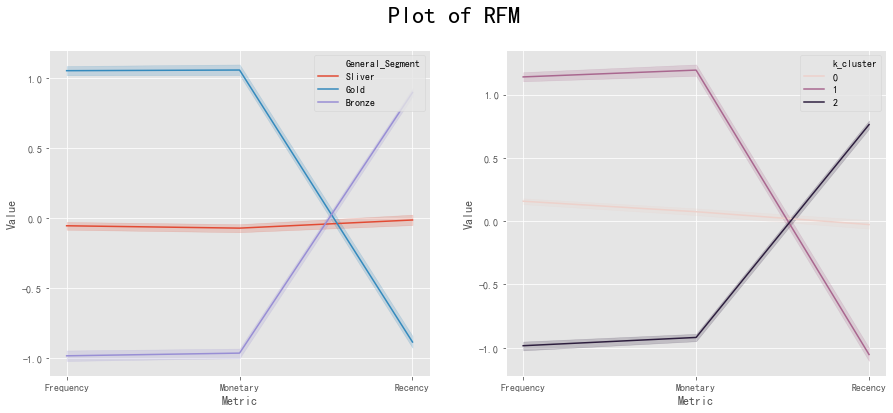

In [55]:
import seaborn as sns
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'General_Segment', data = rfm_melt,ax=ax1)

# a snake plot with K-Means
sns.lineplot(x = 'Metric', y = 'Value', hue ='k_cluster', data = rfm_melt,ax=ax2)

plt.suptitle("Plot of RFM",fontsize=24) #make title fontsize subtitle 
plt.show()


In [56]:
rfm_k3.head()

,Recency,Frequency,Monetary,k_cluster
CustomerID,,,,
12346.0,317,1,77183.60,0
12347.0,31,171,4085.18,1
12348.0,67,31,1797.24,0
12349.0,10,73,1757.55,1
12350.0,302,17,334.40,2


#### 通过使用Kmeans 进行用户聚类，寻找 k_cluster = 1 得高价值用户，对其购物行为进行针对性分析，可以从以下几个方面进行，从而提供个性化得消费方案，形成智能商业模式。
- 对高价值用户的消费习惯(购物时段)
- 购买的商品种类得偏好
- 购物种类的关联性（同时购买得产品）


【Note】
   在这里并未使用模型评估的方法
    - 轮廓系数
    - -------
    若想要验证上面采用RFM模型以及K-Means算法所挖掘得价值用户的有效性和准确性，需要在实际应用中进行验证。

#### 不同属性的相对重要性 (R\F\M)
- 定位每个段的属性的相对重要性的有用技术
- 计算每个层次的平均值
- 计算每个人的平均值
- 通过除以并减去1来计算重要性得分(确保在集群平均值等于总体平均值时返回0)

In [57]:
# The further a ratio is from 0, the more important that attribute is for a segment relative to the total population
cluster_avg = rfm_k3.groupby(['k_cluster']).mean()
population_avg = rfm_k.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,Monetary
k_cluster,,,
0,-0.26,-0.33,-0.45
1,-0.82,1.80,2.04
2,0.90,-0.83,-0.85


In [58]:
# the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
# calculate the proportional gap with total mean
cluster_avg = rfm.groupby('General_Segment').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
prop_rfm.round(2)

,Monetary,Recency,Frequency
General_Segment,,,
Bronze,-0.86,1.09,-0.83
Gold,1.60,-0.77,1.49
Sliver,-0.51,-0.22,-0.46


让我们再试一试热图。热图是数据的图形表示，其中较大的值用较深的刻度表示，较小的值用较浅的刻度表示。我们可以很直观地通过颜色来比较组间的差异。

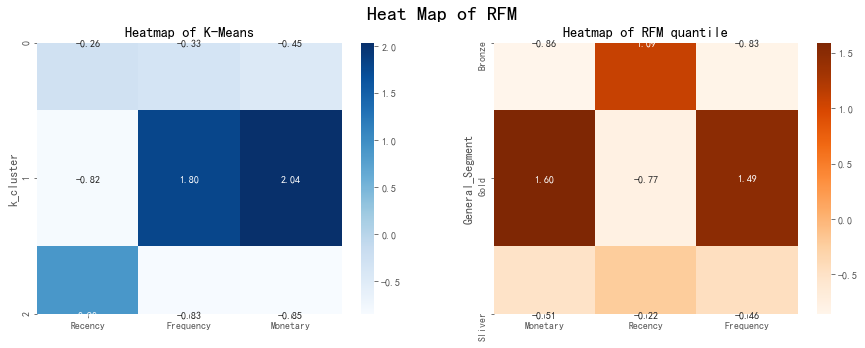

In [59]:
# heatmap with RFM
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='Blues',ax=ax1)
ax1.set(title = "Heatmap of K-Means")

# a snake plot with K-Means
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True,ax=ax2)
ax2.set(title = "Heatmap of RFM quantile")

plt.suptitle("Heat Map of RFM",fontsize=20) #make title fontsize subtitle 

plt.show()

### 价值用户挖掘结果
 - 用户画像
 - 价值用户对销售额的贡献


In [60]:
# cov = coefficient of variance
def cov(x):
    return np.std(x)/np.mean(x)

rfm.groupby('General_Segment').agg({'Recency':['mean','std',cov],'Frequency':['mean','std',cov],'Monetary':['mean','std',cov]}).round(1)

Recency             Frequency             Monetary           \
                   mean    std  cov      mean    std  cov     mean      std   
General_Segment                                                               
Bronze            191.0  100.8  0.5      14.6   11.4  0.8    263.0    177.7   
Gold               20.8   22.5  1.1     217.3  360.6  1.7   5056.7  14721.6   
Sliver             71.3   70.9  1.0      47.4   36.1  0.8    949.4   2433.2   

                      
                 cov  
General_Segment       
Bronze           0.7  
Gold             2.9  
Sliver           2.6

通过之前RFM模型划分的三个层次得出的结果，可以看到
- Gold ：平均消费次数未217次，平均消费金额 5056 英镑， 平均最近一次购买在21天左右
- Sliver  ：平均消费次数未47次，平均消费金额 949 英镑， 平均最近一次购买在2个半月左右
- Bronze : 平均消费次数未15次，平均消费金额 263英镑， 平均最近一次购买在半年左右

比较符合实际用户层次划分消费情况

In [61]:
# cov = coefficient of variance
def cov(x):
    return np.std(x)/np.mean(x)

rfm_k3_sta=rfm_k3.groupby('k_cluster').agg({'Recency':['mean','std',cov],'Frequency':['mean','std',cov],'Monetary':['mean','std',cov]}).round(1)
rfm_k3_sta  

Recency             Frequency             Monetary              
             mean    std  cov      mean    std  cov     mean      std  cov
k_cluster                                                                 
0            67.3   67.0  1.0      58.4   39.6  0.7   1062.6   2392.5  2.3
1            16.3   17.1  1.0     244.4  395.4  1.6   5922.4  16239.1  2.7
2           173.4  106.6  0.6      14.6   11.1  0.8    290.0    269.0  0.9

通过之前K-Means模型划分的三个层次得出的结果，可以看到
- 0（Sliver） ：平均消费次数未59次，平均消费金额 1062 英镑， 平均最近一次购买在两个月左右
- 1 （Gold） ：平均消费次数未244次，平均消费金额 5922 英镑， 平均最近一次购买在半个月左右
- 2 （Bronze）: 平均消费次数未15次，平均消费金额 290英镑， 平均最近一次购买在半年左右

结果比按照RFM模型进行的层次划分稍微好一点

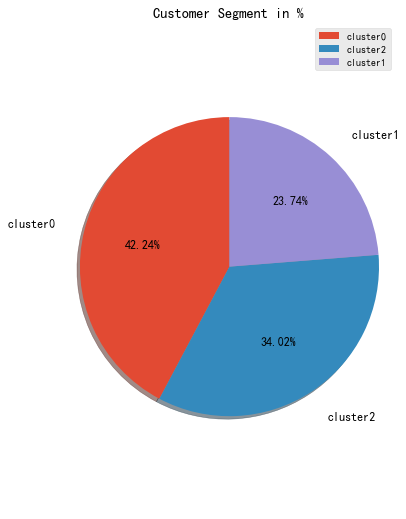

In [62]:
# different customer category and the number of customer using K-means
customer_num=rfm_k3.groupby('k_cluster').agg({'Recency':['count']})

fig=plt.figure(figsize=(6,9))
test=[1815,1462,1020]
labels = [u'cluster0',u'cluster2',u'cluster1']
patches,text1,text2 = plt.pie(test,
                      labels=labels,
                      autopct = '%2.2f%%',
                      labeldistance = 1.2,
                   
                      startangle=90,
                      textprops = {'fontsize':12},
                      pctdistance = 0.6,
                      shadow=True)
plt.axis('equal')
plt.legend()
plt.title('Customer Segment in %')
plt.show()


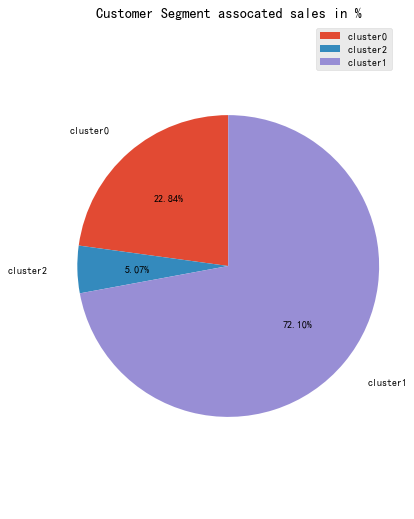

In [63]:
# different customer category and associated sales using K-means
customer_sales=rfm_k3.groupby('k_cluster').agg({'Monetary':['sum']})
# pie figure
fig=plt.figure(figsize=(6,9))
test=[1911297.113,424054.261,6034667.080]
labels = [u'cluster0',u'cluster2',u'cluster1']

patches,text1,text2 = plt.pie(test,
                      labels=labels,
                      autopct = '%2.2f%%',
                      labeldistance = 1.2,
                      shadow=False,
                      startangle=90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.title('Customer Segment assocated sales in %')
plt.show()

In [64]:
customer_sales

,Monetary
,sum
k_cluster,
0,1927466.103
1,6017144.370
2,425407.981


In [68]:
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics

In [71]:
rfm_normalized

array([[ 1.40136246, -2.78496733,  3.74301399],
       [-0.22448511,  1.1400683 ,  1.39967282],
       [ 0.31448072, -0.16353518,  0.74493773],
       ...,
       [ 0.71028741, -1.29950128, -1.55687477],
       [-2.62592379,  2.18368737,  0.76261562],
       [-0.15988707,  0.45824278,  0.76250713]])

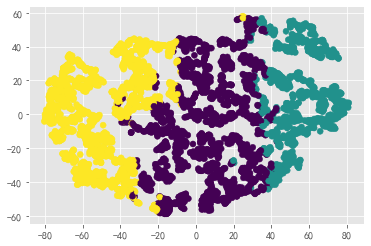

----------------------------------------------------------------------------------------------------


In [73]:
#降维

tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(rfm_normalized)
k_range = KMeans(n_clusters=3, random_state=1)
k_range.fit(rfm_normalized)
# labels = KMeans(n_clusters = 3,random_state=1).fit_predict(rfm_normalized)
cluster_labels = k_range.labels_

plt.scatter(X_tsne[:, 0],X_tsne[:, 1], c=cluster_labels)
plt.show()
print("-" * 100)




In [74]:
silhouette_pred_sk = metrics.silhouette_score(rfm_normalized, cluster_labels, metric='euclidean')
CHI_sk = metrics.calinski_harabasz_score(rfm_normalized, cluster_labels)
print(silhouette_pred_sk)
print(CHI_sk)

0.29370479595533555
2955.7053023816416


### 总结

本次分析利用Python语言对电子零售数据进行了数据分析和挖掘，计算分析主要有两个方面：

（1）描述统计分析；

    通过描述统计分析，我们了解了该电子商务公司的整体运营情况，计算了月销售数量、月销售总额、月均销售额、周销售量、周销售总额、周均销售额、客单价、件单价、连带率，通过这些指标我们了解到该电子商务公司月销售单数、月销售额在2011年的9月、10月以及11月有明显的增长，周销售额在星期四达到最高值。

（2）使用了两种方法RFM模型以及K-Means机器学习算法挖掘价值用户。

    为了挖掘价值用户，我们使用了两种方法，第一个方法是利用RFM模型对用户进行评分分组，第二个方法是利用K-Means算法对用户进行“机器学习”分组，两种方法都挖掘出价值用户，比较两种方法得出的用户画像结果，K-Means方法得出的结果更好一些，最终挖掘出的价值用户占比23.74%却贡献了72.10%的销售额。

确定价值用户之后可以进一步学习价值用户的消费习惯，从而提供以消费者为中心的智能商业模式，根据实际应用情况进行多次迭代来优化价值用户挖掘的模型。